# Homework 4: Graph Spectra

Date: 01/12/2024

Authors: Yilai Chen and Chenyang Ding

# Introduction

This assignment implements the algorithm mentioned in the paper "[On Spectral Clustering: Analysis and an algorithm](http://ai.stanford.edu/~ang/papers/nips01-spectral.pdf)" by Andrew Y. Ng, Michael I. Jordan, Yair Weiss. 

In addition, automatic selection of the number of clusters is implemented by analyzing feature gaps.
The code utilizes numpy for fast computations and networkx for loading and representing graphs. Finally, the code uses the Scikit Learn implementation of the K-means clustering algorithm to perform the actual clustering.

## Running Steps:

1. Install python3.
1. Related Libraries are installed in environment.
1. Start Jupyter Notebook. Open this file and run.

To visualize the spectral graph clustering algorithm, we use networkx to draw a graph and a series of related vector graphs, etc.

### Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import os
from spectral_clustering import *
from utils import *

sns.set_style('whitegrid')

### Define Path

In [2]:
path = os.path.dirname(os.getcwd())
data_1 = os.path.join(path, 'data', 'example1.dat')
data_1

'/Users/islandamoon/Downloads/homework4/data/example1.dat'

In [3]:
data_2 = os.path.join(path, 'data', 'example2.dat')
data_2

'/Users/islandamoon/Downloads/homework4/data/example2.dat'

## Graph 1

By visual inspection we can guess that the first graph is composed of approximately four clusters.

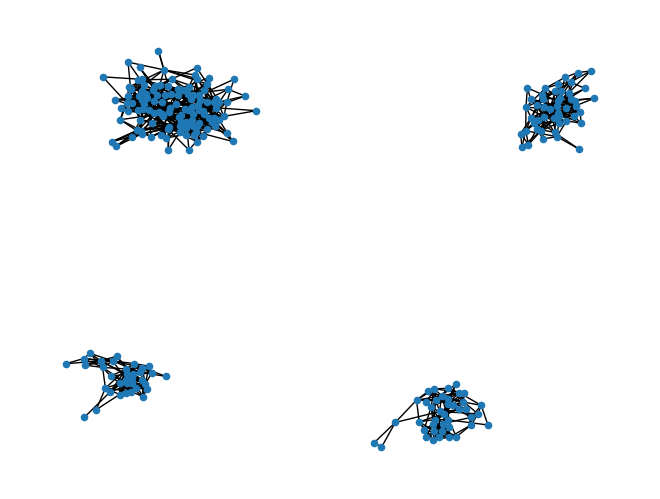

In [4]:
G = load_graph(data_1)
nx.draw(G, node_size=20)
plt.show()

We apply the spectral graph clustering algorithm and confirm that it has identified four clusters.

In [5]:
classes, fiedler, adjacency_matrix = spectral_clustering(G)

Computing clusters...
The estimated optimal number of clusters is 239.
Clusters computed.


### Sorted Fiedler Vector

We plot the sorted Fiedler vector, that is, the eigenvector of the second smallest eigenvalue of the graph's adjacency matrix. By visual inspection, we can clearly see that the eigenvector has three distinct set of values: the extremes and the middle point at zero. Additionally, there is probably a cluster in one of the transitions, summing up to four clusters.

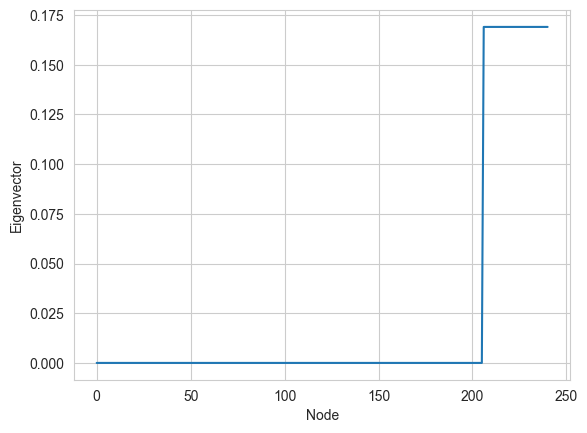

In [6]:
plt.plot(np.sort(fiedler))
plt.xlabel("Node")
plt.ylabel("Eigenvector");

### adjacency_matrix
The four distinct blocks in the matrix indicate that there are four communities in the graph.

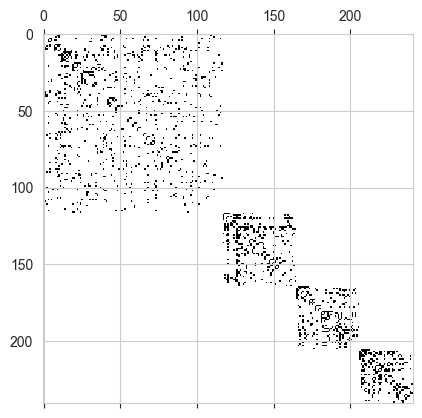

In [7]:
plt.spy(adjacency_matrix);

### Clustered Graph

Finally, we plot the graph with the colors representing the class given by the spectral graph clustering algorithm and we can see that they correspond to four different connected components.

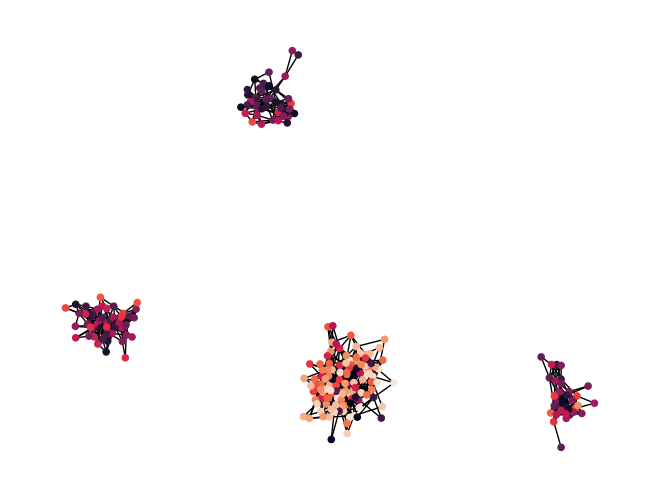

In [8]:
nx.draw(G, node_size=20, node_color=classes)

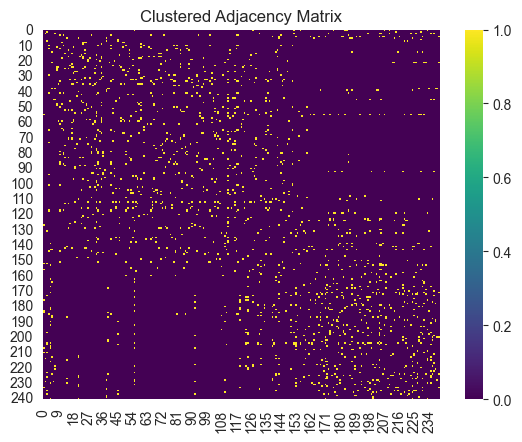

In [9]:
# 展示邻接矩阵的聚类排序情况，通过对节点重新排序后绘制热力图。展现簇的内部结构（簇内密集，簇间稀疏）。
# 根据聚类结果对邻接矩阵排序
sorted_indices = np.argsort(classes)
sorted_adjacency_matrix = adjacency_matrix[sorted_indices, :][:, sorted_indices]

# 绘制热力图
sns.heatmap(sorted_adjacency_matrix, cmap='viridis', cbar=True)
plt.title("Clustered Adjacency Matrix")
plt.show()

## Graph 2

We plot the second graph and we observe that it contains at least two clusters that are not separate connected components.

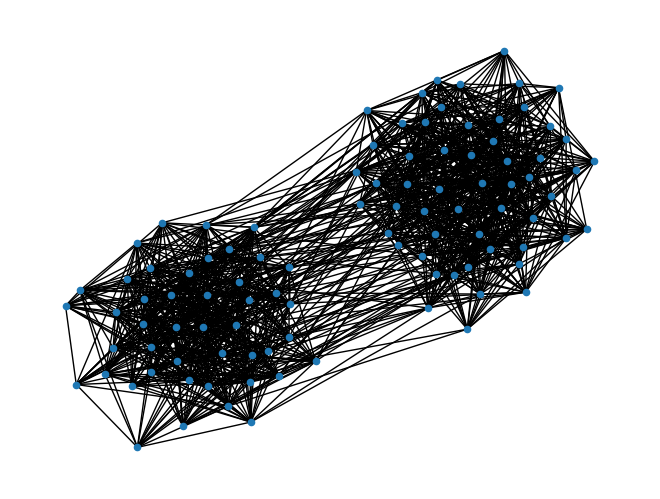

In [10]:
G = load_weight_graph(data_2)
nx.draw(G, node_size=20)
plt.show()

We apply the spectral graph clustering algorithm and confirm the existence of two clusters.

In [11]:
classes, fiedler, adjacency_matrix = spectral_clustering(G)

Computing clusters...
The estimated optimal number of clusters is 48.
Clusters computed.


### Sorted Fiedler Vector

The plot of the Fiedler Vector makes clear the existence of two clusters with a slow transition, which can be an indication that the clusters are connected and not separate components as in the first graph.

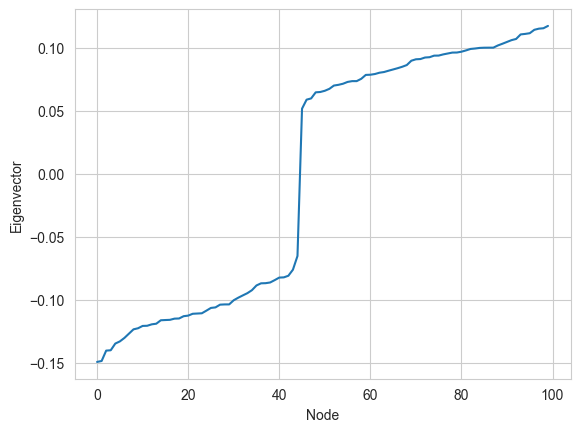

In [12]:
plt.plot(np.sort(fiedler))
plt.xlabel("Node")
plt.ylabel("Eigenvector");

### Sparsity Pattern

The sparsity pattern shows how even separate clusters are connected and the clustering task is more complex than in the first graph.

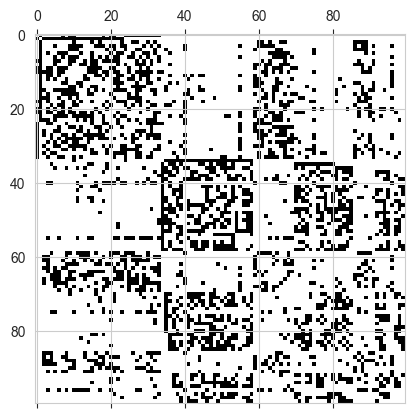

In [13]:
plt.spy(adjacency_matrix);

### Clustered Graph

The clustered graph shows a clear separation between two clusters.

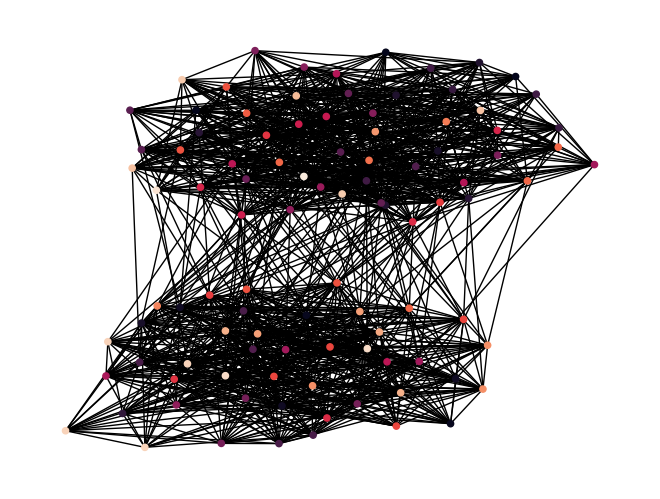

In [14]:
nx.draw(G, node_size=20, node_color=classes)

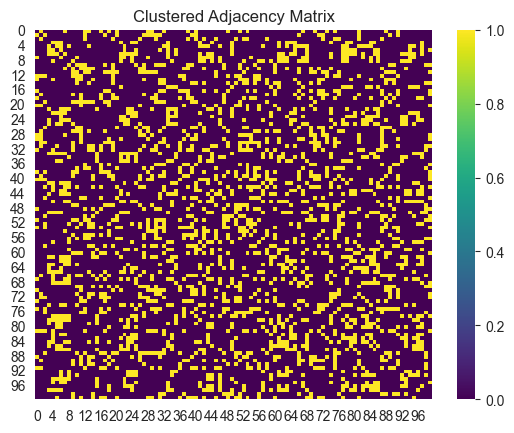

In [15]:
sorted_indices = np.argsort(classes)
sorted_adjacency_matrix = adjacency_matrix[sorted_indices, :][:, sorted_indices]

# 绘制热力图
sns.heatmap(sorted_adjacency_matrix, cmap='viridis', cbar=True)
plt.title("Clustered Adjacency Matrix")
plt.show()